In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
#한글 폰트 안깨지게 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 데이터 불러오기(2013-01~2023-09)

In [73]:
data = pd.read_csv('../응용통계특수연구/data/data.csv', encoding='cp949')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택매매가격지수
0,13-Jan,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.31,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,70.462
1,13-Feb,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.30,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,70.421
2,13-Mar,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,3.17,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,70.389
3,13-Apr,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,3.15,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,70.391
4,13-May,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,3.17,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,70.381


In [74]:
from datetime import datetime
for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')
data.head()

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_24120\1366291810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')


,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택매매가격지수
0,2013-01-01 00:00:00,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.31,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,70.462
1,2013-02-01 00:00:00,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.30,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,70.421
2,2013-03-01 00:00:00,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,3.17,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,70.389
3,2013-04-01 00:00:00,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,3.15,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,70.391
4,2013-05-01 00:00:00,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,3.17,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,70.381


In [75]:
# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2013-01-01 to 2023-09-01
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준금리        129 non-null    float64
 1   주택건설인허가실적   129 non-null    int64  
 2   전산업생산지수     129 non-null    float64
 3   주택담보대출금리    129 non-null    float64
 4   건설업_업황전망    129 non-null    int64  
 5   건설업_매출전망    129 non-null    int64  
 6   건설업_자금사전전망  129 non-null    int64  
 7   소비자물가지수     129 non-null    float64
 8   생산자물가지수     129 non-null    float64
 9   미분양주택현황     129 non-null    int64  
 10  실업률         129 non-null    float64
 11  고용률         129 non-null    float64
 12  M2          129 non-null    int64  
 13  CD금리        129 non-null    float64
 14  국고채(3년)     129 non-null    float64
 15  국고채(10년)    129 non-null    float64
 16  국고채(30년)    129 non-null    float64
 17  회사채(3년)     129 non-null    float64
 18  KOSPI_종가    129 non-null    float64
 19  KOSDAQ_종가 

In [77]:
data.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '주택전세가격지수', '환율', '주택매매가격지수'],
      dtype='object')

In [78]:
var_group = {'건축 및 부동산': ['주택건설인허가실적', '주택담보대출금리', '미분양주택현황', '건설업_업황전망', '건설업_매출전망', '건설업_자금사전전망'],
             '금융': ['기준금리', 'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가', 'KOSDAQ_종가', '국채 거래량', '회사채 거래량', '환율'],
             '경제 생산': ['전산업생산지수', '소비자물가지수', '생산자물가지수', '실업률', '고용률', 'M2', 'GDP']} # 주택전세가격지수는 pca 적용 X

<AxesSubplot:xlabel='Date'>

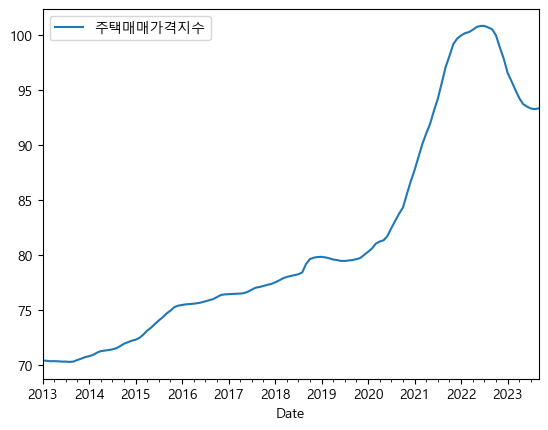

In [79]:
data[['주택매매가격지수']].plot() 

In [80]:
data.shape

(129, 26)

### Scaling

In [81]:
# train, test 분리
train = data[:int(len(data)*0.9)]
test = data[int(len(data)*0.9):]
y_train = train[['주택매매가격지수']]
y_test = test[['주택매매가격지수']]
X_train = train.drop(columns=['주택매매가격지수'], axis=1)
X_test = test.drop(columns=['주택매매가격지수'], axis=1)

In [82]:
from sklearn.preprocessing import MinMaxScaler
mm_X_train = MinMaxScaler()
X_train_sc = mm_X_train.fit_transform(X_train)
mm_y_train = MinMaxScaler()
y_train_sc = mm_y_train.fit_transform(y_train)

mm_X_test = MinMaxScaler()
X_test_sc = mm_X_test.fit_transform(X_test)
mm_y_test = MinMaxScaler()
y_test_sc = mm_y_test.fit_transform(y_test)

In [83]:
X_train_sc = pd.DataFrame(X_train_sc, index=X_train.index)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc, index=X_test.index)
X_test_sc.columns = X_test.columns

In [84]:
y_train_sc = pd.DataFrame(y_train_sc, index=y_train.index)
y_train_sc.columns = y_train.columns

y_test_sc = pd.DataFrame(y_test_sc, index=y_test.index)
y_test_sc.columns = y_test.columns

In [85]:
X = pd.concat([X_train_sc, X_test_sc])
X_pca = X.drop(columns=['주택전세가격지수'], axis=1) # 주택전세가격지수는 pca X

In [86]:
X_pca.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '환율'],
      dtype='object')

#### 그룹 각각의 공통요인 추출

In [87]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA 수행 함수
def apply_pca(variables, group_name, n_components=1):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(variables)
    explained_variance_ratio = pca.explained_variance_ratio_
    return pd.DataFrame(data=principal_components, columns=[f'{group_name}_pc{i+1}' for i in range(n_components)]), explained_variance_ratio

# 각 변수 그룹에 대한 PCA 수행
pca_results = {}
explained_variance_ratios = {}

for group, variables in var_group.items():
    variables_data = X_pca[variables]
    pca_results[group], explained_variance_ratios[group] = apply_pca(variables_data, group)

# 결과 출력
for group, result_df in pca_results.items():
    print(f"PCA results for {group}:")
    print(result_df)
    print(f"Explained Variance Ratios for {group}: {explained_variance_ratios[group]}")
    print("\n")


PCA results for 건축 및 부동산:
     건축 및 부동산_pc1
0        1.085878
1        0.879531
2        0.862982
3        0.741871
4        0.753974
..            ...
124      0.420804
125      0.439774
126      0.156231
127      0.127561
128      0.289709

[129 rows x 1 columns]
Explained Variance Ratios for 건축 및 부동산: [0.4930965]


PCA results for 금융:
       금융_pc1
0    1.075743
1    0.994449
2    0.919476
3    0.859075
4    0.848546
..        ...
124 -0.464436
125 -0.059547
126 -0.022398
127  0.225937
128  0.472042

[129 rows x 1 columns]
Explained Variance Ratios for 금융: [0.54946388]


PCA results for 경제 생산:
     경제 생산_pc1
0    -0.620645
1    -0.612717
2    -0.535807
3    -0.473060
4    -0.448009
..         ...
124   0.066421
125   0.167312
126   0.304249
127   0.808743
128   1.162990

[129 rows x 1 columns]
Explained Variance Ratios for 경제 생산: [0.50686641]




In [88]:
# 각 PCA 결과를 하나의 DataFrame으로 합치기
X_pca = pd.concat(pca_results.values(), axis=1)
X_pca.index = data.index

X_train_pca = X_pca[:int(len(X_pca)*0.9)]
X_test_pca = X_pca[int(len(X_pca)*0.9):]

In [89]:
train_total = pd.concat([X_train_pca, X_train_sc[['주택전세가격지수']], y_train_sc], axis=1)

### DFM

In [20]:
import numpy as np

# Define the range of values for n_factors and factor_order
n_factors_range = [1, 2, 3, 4, 5]
factor_order_range = [2, 3, 4, 5]

best_aic = np.inf
best_params = None

endog = train_total

# Perform grid search
for n_factors in n_factors_range:
    for factor_order in factor_order_range:
        # Create and fit the DFM model
        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)
        dfm_results = dfm.fit(maxiter=500)

        # Get AIC for the current model
        current_aic = dfm_results.aic

        # Update the best parameters if the current model has a lower AIC
        if current_aic < best_aic:
            best_aic = current_aic
            best_params = {'n_factors': n_factors, 'factor_order': factor_order}

# Print the best parameters
print(f"Best parameters: {best_params}")
# maxiter=500 일 때, n_factors=1, factor_order=2


NameError: name 'DynamicFactor' is not defined

In [90]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

endog = train_total

# DFM 모델 정의
n_factors = 1
dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=2, enforce_stationarity=True)

dfm_results = dfm.fit(maxiter=500) #maxiter=1000, optim_score='approx', optim_complex_step='approx', optim_hessian=None)


c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [91]:
dfm_results.summary()

Dep. Variable:,"['건축 및 부동산_pc1', '금융_pc1', '경제 생산_pc1', '주택전세가격지수', '주택매매가격지수']",No. Observations:,116
Model:,"DynamicFactor(factors=1, order=2)",Log Likelihood,1184.066
,+ AR(2) errors,AIC,-2324.131
Date:,"Sun, 03 Dec 2023",BIC,-2263.552
Time:,13:23:09,HQIC,-2299.539
Sample:,01-01-2013,,
,- 08-01-2022,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"8.89, 6.52, 5.36, 1.85, 0.08",Jarque-Bera (JB):,"21.07, 51.49, 1.21, 10.06, 179.76"
Prob(Q):,"0.00, 0.01, 0.02, 0.17, 0.77",Prob(JB):,"0.00, 0.00, 0.55, 0.01, 0.00"
Heteroskedasticity (H):,"0.64, 2.09, 1.80, 1.80, 9.24",Skew:,"0.81, 1.06, -0.19, 0.29, 0.94"


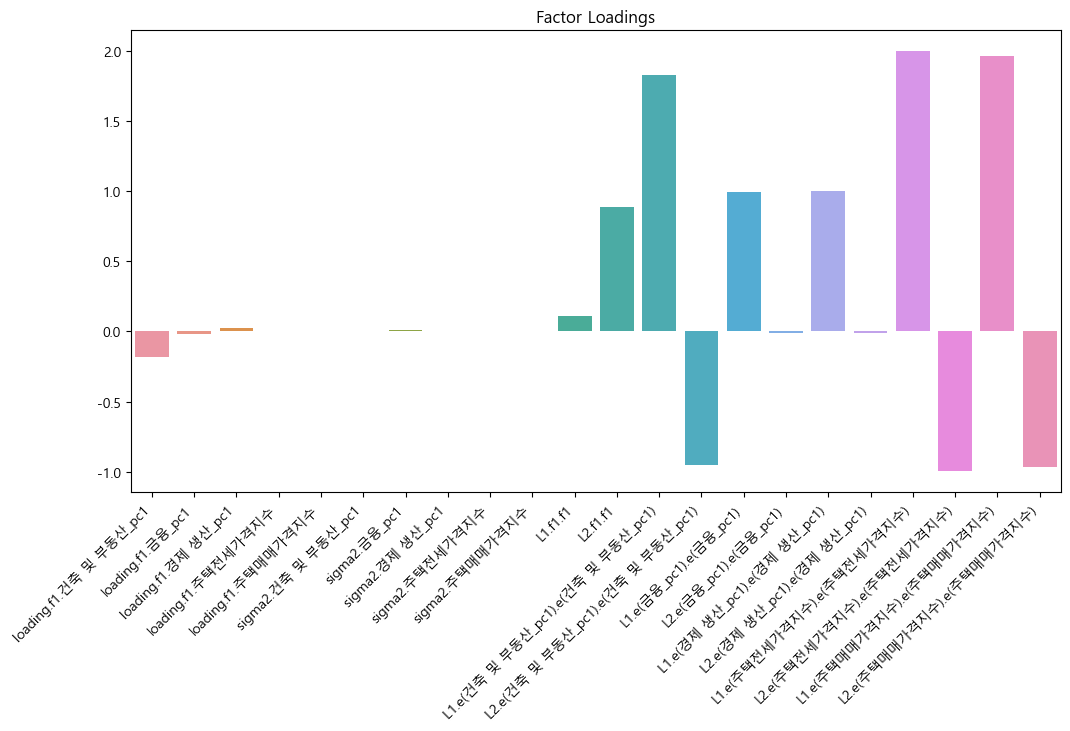

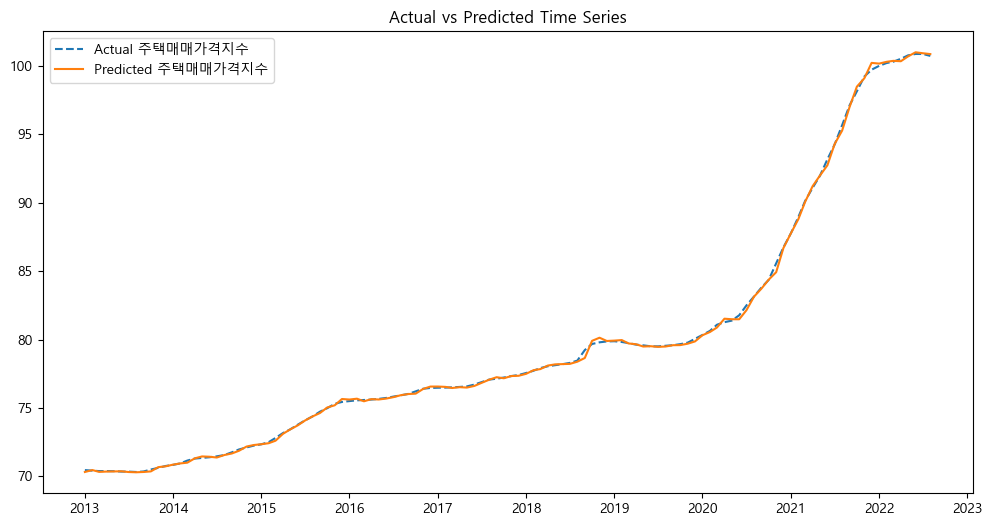

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract factor loadings from the results
factor_loadings = dfm_results.params

# Plot factor loadings
plt.figure(figsize=(12, 6))
sns.barplot(x=factor_loadings.index, y=factor_loadings.values)
plt.title('Factor Loadings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot time series of dependent variables and predicted values
fig, ax = plt.subplots(figsize=(12, 6))
y_pred = mm_y_train.inverse_transform(dfm_results.predict()[['주택매매가격지수']])
y_pred = pd.DataFrame(y_pred, index = y_train.index)
y_pred.columns = y_train.columns
for i, variable in enumerate(['주택매매가격지수']):
    ax.plot(y_train.index, y_train[variable], label=f'Actual {variable}', linestyle='--')
    ax.plot(y_train.index, y_pred[variable], label=f'Predicted {variable}')

ax.set_title('Actual vs Predicted Time Series')
ax.legend()
plt.show()


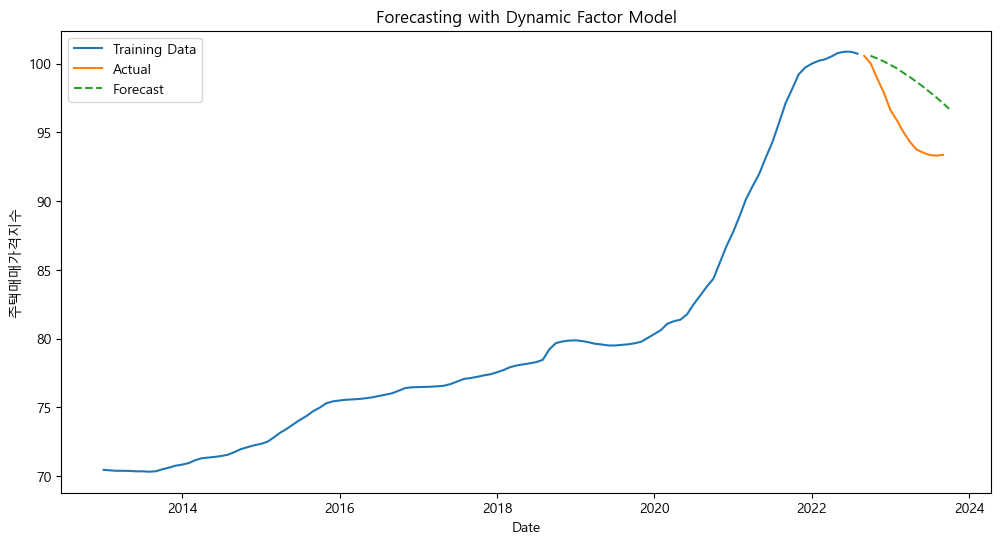

In [93]:
# Number of periods to forecast
forecast_periods = 13

# Get the prediction and forecast
dfm_forecast = dfm_results.get_forecast(steps=forecast_periods)

# Extract predicted values
y_pred_forecast = dfm_forecast.predicted_mean[['주택매매가격지수']]

# Inverse transform the predicted values to the original scale
y_pred_forecast_original = mm_y_train.inverse_transform(y_pred_forecast)

# Create a DataFrame for the forecast values
forecast_index = pd.date_range(start=y_train.index[-1], periods=forecast_periods + 1, freq='M')[1:]
y_pred_forecast_df = pd.DataFrame(y_pred_forecast_original, index=forecast_index, columns=['주택매매가격지수'])

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train['주택매매가격지수'], label='Training Data', linestyle='-')
plt.plot(y_test.index, y_test['주택매매가격지수'], label='Actual', linestyle = '-')
plt.plot(y_pred_forecast_df.index, y_pred_forecast_df['주택매매가격지수'], label='Forecast', linestyle='--')
plt.title('Forecasting with Dynamic Factor Model')
plt.xlabel('Date')
plt.ylabel('주택매매가격지수')
plt.legend()
plt.show()


In [94]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_pred['주택매매가격지수'], y_train['주택매매가격지수'])**0.5
print('Train RMSE:', train_rmse)
test_rmse = mean_squared_error(y_test, y_pred_forecast_df)**0.5
print('Test RMSE:', test_rmse)

Train RMSE: 0.15085871399378867
Test RMSE: 3.35822625377361


In [236]:
y_pred_forecast_df

,주택매매가격지수
2022-09-30,100.516529
2022-10-31,100.232245
2022-11-30,99.876453
2022-12-31,99.450015
2023-01-31,98.953963
2023-02-28,98.389495
2023-03-31,97.757972
2023-04-30,97.060917
2023-05-31,96.300007
2023-06-30,95.477074


## VAR

<AxesSubplot:xlabel='Date'>

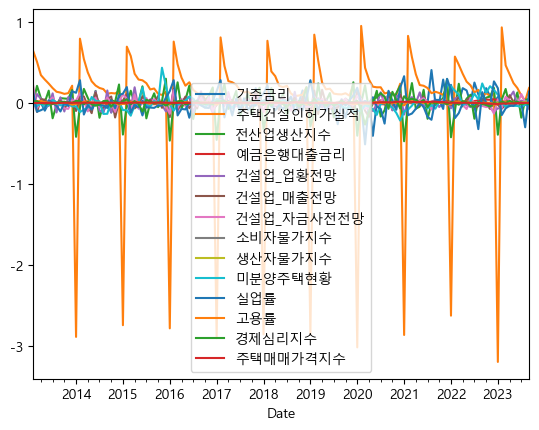

In [ ]:
diff1_data = np.log(data).diff().dropna()
diff1_data.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Stationarity Check
# (H0): non-stationary
# (H1): stationary

def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: {:.4f}'.format(result[0]))
  print('p-value: {:.4f}'.format(result[1]))

for i in diff1_data:
  print('--Test statistic for %s' % i)
  adf(diff1_data[i])
  print() # 몇몇 변수가 정상성 만족하지 않으므로 한번 더 차분

--Test statistic for 기준금리
ADF Statistic: -3.6186
p-value: 0.0054

--Test statistic for 주택건설인허가실적
ADF Statistic: -1.0601
p-value: 0.7307

--Test statistic for 전산업생산지수
ADF Statistic: -1.5658
p-value: 0.5008

--Test statistic for 예금은행대출금리
ADF Statistic: -2.2810
p-value: 0.1782

--Test statistic for 건설업_업황전망
ADF Statistic: -10.7340
p-value: 0.0000

--Test statistic for 건설업_매출전망
ADF Statistic: -9.5005
p-value: 0.0000

--Test statistic for 건설업_자금사전전망
ADF Statistic: -4.7223
p-value: 0.0001

--Test statistic for 소비자물가지수
ADF Statistic: -2.0230
p-value: 0.2766

--Test statistic for 생산자물가지수
ADF Statistic: -2.4737
p-value: 0.1220

--Test statistic for 미분양주택현황
ADF Statistic: -3.1796
p-value: 0.0212

--Test statistic for 실업률
ADF Statistic: -2.5528
p-value: 0.1032

--Test statistic for 고용률
ADF Statistic: -2.7160
p-value: 0.0713

--Test statistic for 경제심리지수
ADF Statistic: -6.9234
p-value: 0.0000

--Test statistic for 주택매매가격지수
ADF Statistic: -2.2755
p-value: 0.1800



--Test statistic for 기준금리
ADF Statistic: -7.7262
p-value: 0.0000

--Test statistic for 주택건설인허가실적
ADF Statistic: -13.7284
p-value: 0.0000

--Test statistic for 전산업생산지수
ADF Statistic: -9.0844
p-value: 0.0000

--Test statistic for 예금은행대출금리
ADF Statistic: -9.3580
p-value: 0.0000

--Test statistic for 건설업_업황전망
ADF Statistic: -5.5895
p-value: 0.0000

--Test statistic for 건설업_매출전망
ADF Statistic: -7.5556
p-value: 0.0000

--Test statistic for 건설업_자금사전전망
ADF Statistic: -10.9576
p-value: 0.0000

--Test statistic for 소비자물가지수
ADF Statistic: -5.4823
p-value: 0.0000

--Test statistic for 생산자물가지수
ADF Statistic: -8.5811
p-value: 0.0000

--Test statistic for 미분양주택현황
ADF Statistic: -10.2630
p-value: 0.0000

--Test statistic for 실업률
ADF Statistic: -11.3720
p-value: 0.0000

--Test statistic for 고용률
ADF Statistic: -7.7784
p-value: 0.0000

--Test statistic for 경제심리지수
ADF Statistic: -6.9980
p-value: 0.0000

--Test statistic for 주택매매가격지수
ADF Statistic: -11.1545
p-value: 0.0000



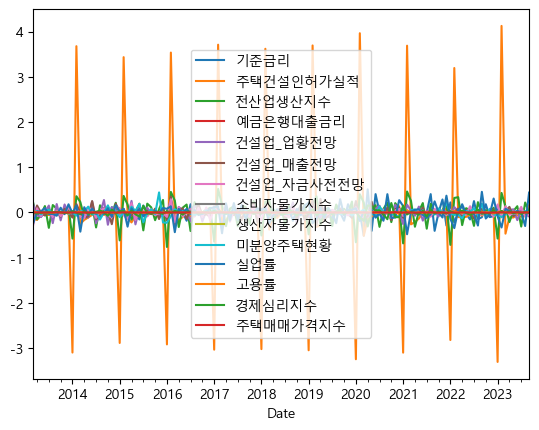

In [ ]:
diff2_data = diff1_data.diff().dropna()
diff2_data.plot()
for i in diff2_data:
  print('--Test statistic for %s' % i)
  adf(diff2_data[i])
  print() # 모든 변수가 정상성을 만족함

In [ ]:
# train, test 분리
X_train_diff2 = diff2_data[:int(len(diff2_data)*0.9)]
X_test_diff2 = diff2_data[int(len(diff2_data)*0.9):]

print(X_train_diff2.shape, X_test_diff2.shape) # train:2013-03 ~ 2022-08 / test: 2022-09 ~ 2023-09

(114, 14) (13, 14)


In [ ]:
# VAR 모델링 
from statsmodels.tsa.api import VAR
endogeneous_var = X_train_diff2.iloc[:,1:] # 기준금리 외 모든 변수는 내생변수
exogeneous_var = X_train_diff2.iloc[:,0] # 기준금리를 외생변수로 설정 
model_var = VAR(endog=endogeneous_var, exog=exogeneous_var)

var_fit = model_var.fit(maxlags=3, ic='aic')

var_fit.summary()

c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Dec, 2023
Time:                     22:41:21
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                   -80.2523
Nobs:                     111.000    HQIC:                  -87.9849
Log likelihood:           3661.57    FPE:                5.05024e-41
AIC:                     -93.2630    Det(Omega_mle):     8.48290e-43
--------------------------------------------------------------------
Results for equation 주택건설인허가실적
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.001160         0.037721           -0.031           0.975
기준금리                 -0.019922         0.367814           -0.054           0.957
L1.주택건설인허가실적         -0.990179         0.102873         

<AxesSubplot:xlabel='Date'>

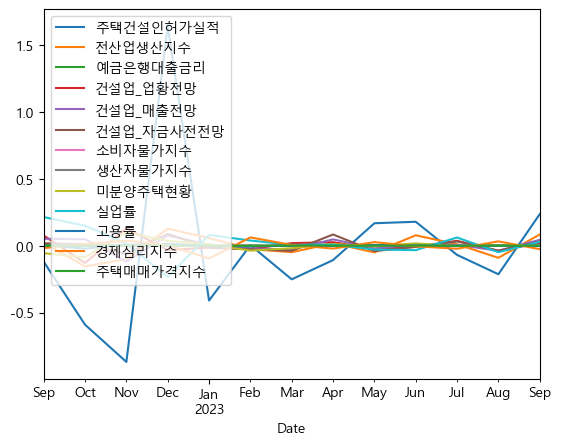

In [ ]:
# Forecasting using the VAR model
lag_order = var_fit.k_ar
forecast_input = X_train_diff2.iloc[:,1:].values[-lag_order:]
forecast_steps = len(X_test_diff2)

# Forecasting
forecast = var_fit.forecast(y=forecast_input, steps=forecast_steps, exog_future=exogeneous_var[-forecast_steps:])
forecast_df = pd.DataFrame(forecast, index=X_test_diff2.iloc[:,1:].index, columns=X_test_diff2.iloc[:,1:].columns)

# Plot the forecasts
forecast_df.plot()


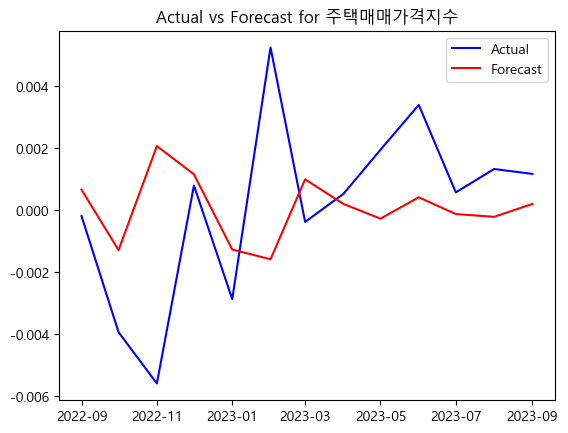

RMSE for 주택매매가격지수: 0.0032242300596714187


In [ ]:
from sklearn.metrics import mean_squared_error

# Extract and plot the forecast for '주택매매가격지수'
forecast_housing_price = forecast_df['주택매매가격지수']
X_test_diff2_housing_price = X_test_diff2['주택매매가격지수']

# Plot the forecast
plt.plot(X_test_diff2_housing_price.index, X_test_diff2_housing_price, label='Actual', color='blue')
plt.plot(forecast_housing_price.index, forecast_housing_price, label='Forecast', color='red')
plt.legend()
plt.title('Actual vs Forecast for 주택매매가격지수')
plt.show()

# Calculate RMSE
rmse_housing_price = np.sqrt(mean_squared_error(X_test_diff2_housing_price, forecast_housing_price))
print(f'RMSE for 주택매매가격지수: {rmse_housing_price}')


In [ ]:
data.iloc[-len(X_test_diff2):, 13]

Date
2022-09-01    100.568
2022-10-01    100.014
2022-11-01     98.909
2022-12-01     97.894
2023-01-01     96.612
2023-02-01     95.848
2023-03-01     95.054
2023-04-01     94.316
2023-05-01     93.766
2023-06-01     93.536
2023-07-01     93.360
2023-08-01     93.308
2023-09-01     93.365
Name: 주택매매가격지수, dtype: float64

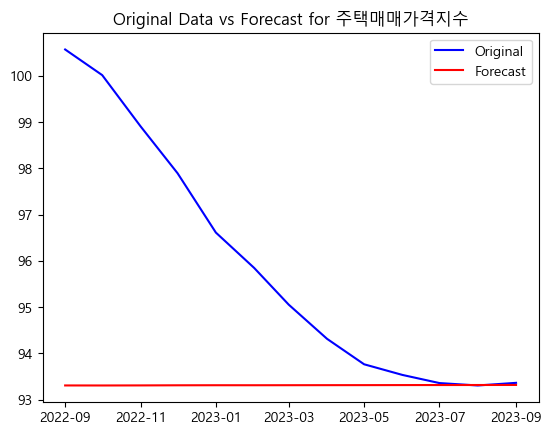

RMSE for 주택매매가격지수 (Original Data): 3.633275220623345


In [ ]:
from sklearn.metrics import mean_squared_error

# Reverse the 2nd-order differencing for the forecast of '주택매매가격지수'
forecast_diff2_housing_price = forecast_df['주택매매가격지수']
forecast_diff1_housing_price = np.cumsum(forecast_diff2_housing_price)  # Reverse 2nd-order differencing
forecast_original_housing_price = np.cumsum(forecast_diff1_housing_price) + data['주택매매가격지수'].iloc[-2]  # Reverse 1st-order differencing

# Plot the original data and the forecast
plt.plot(data.iloc[-len(X_test_diff2):, 13].index, data.iloc[-len(X_test_diff2):, 13], label='Original', color='blue')
plt.plot(forecast_original_housing_price.index, forecast_original_housing_price, label='Forecast', color='red')
plt.legend()
plt.title('Original Data vs Forecast for 주택매매가격지수')
plt.show()

# Calculate RMSE for the original data
rmse_original_housing_price = np.sqrt(mean_squared_error(data['주택매매가격지수'].iloc[-len(X_test_diff2):], forecast_original_housing_price))
print(f'RMSE for 주택매매가격지수 (Original Data): {rmse_original_housing_price}')


In [ ]:
forecast_original_housing_price

Date
2022-09-01    93.308660
2022-10-01    93.308032
2022-11-01    93.309470
2022-12-01    93.312063
2023-01-01    93.313388
2023-02-01    93.313130
2023-03-01    93.313865
2023-04-01    93.314800
2023-05-01    93.315463
2023-06-01    93.316539
2023-07-01    93.317489
2023-08-01    93.318224
2023-09-01    93.319160
Name: 주택매매가격지수, dtype: float64

In [ ]:
from sklearn.decomposition import PCA

# PCA를 사용하여 주택매매가격지수에 대한 변수 중요도 확인
pca = PCA()
pca.fit(endogeneous_var.iloc[:,:-1])  # endogeneous_var: 주택매매가격지수,외생변수를 제외한 변수들

# 주성분(PC)에 대한 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# 변수 중요도 확인
variable_importance = pca.components_[0]  # 첫 번째 주성분에 대한 변수 중요도
print("Variable Importance:")
print(variable_importance)

# 주택매매가격지수에 대한 변수 중요도 확인
housing_price_importance = variable_importance[0]
print("Housing Price Importance:", housing_price_importance)

variable_names = endogeneous_var.iloc[:,:-1].columns

# 주택매매가격지수에 대한 변수 중요도와 변수 이름을 연결하여 출력
variable_importance_dict = dict(zip(variable_names, variable_importance))
print("Variable Importance:")
for var, importance in variable_importance_dict.items():
    print(f"{var}: {importance}")

Explained Variance Ratio:
[9.42936711e-01 2.09495089e-02 1.44368345e-02 9.70883230e-03
 4.95040981e-03 3.46422623e-03 2.16281851e-03 1.32583179e-03
 3.81558039e-05 1.23133913e-05 9.62175950e-06 4.73646100e-06]
Variable Importance:
[ 9.88874221e-01  1.45011041e-01 -1.62667828e-04  1.77673602e-02
  1.79143338e-02  1.12580652e-02 -6.49614769e-04 -4.40659931e-04
 -2.21236606e-03 -1.73708064e-02  2.69133933e-03 -4.65840538e-03]
Housing Price Importance: 0.988874221234807
Variable Importance:
주택건설인허가실적: 0.988874221234807
전산업생산지수: 0.14501104073322524
예금은행대출금리: -0.00016266782849118114
건설업_업황전망: 0.017767360184504363
건설업_매출전망: 0.01791433380985029
건설업_자금사전전망: 0.011258065159953009
소비자물가지수: -0.0006496147688279864
생산자물가지수: -0.0004406599314084374
미분양주택현황: -0.002212366063262878
실업률: -0.017370806393706133
고용률: 0.0026913393328350187
경제심리지수: -0.00465840537989876


In [ ]:
endogeneous_var.iloc[:,:-1].columns

Index(['주택건설인허가실적', '전산업생산지수', '예금은행대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', '경제심리지수'],
      dtype='object')

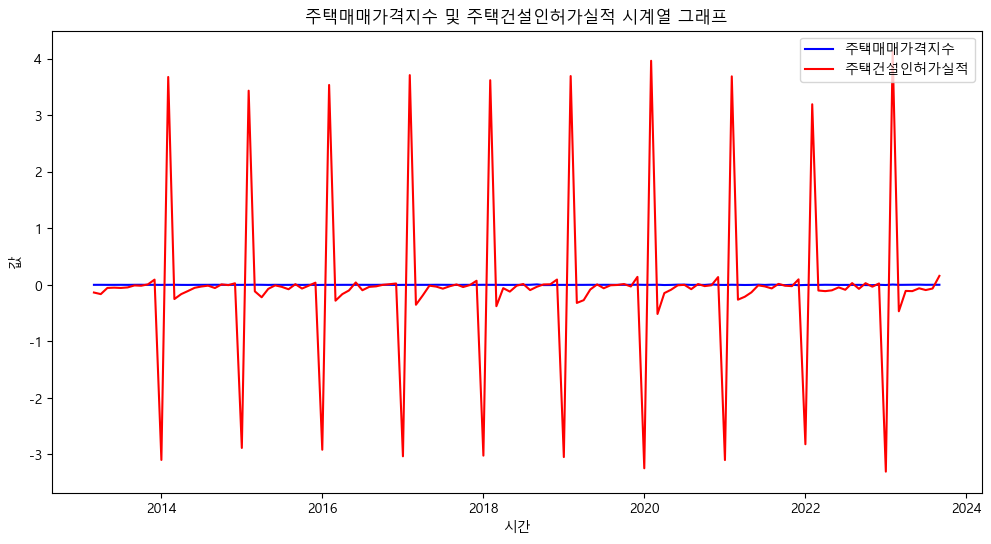

In [ ]:
import matplotlib.pyplot as plt

# 주택매매가격지수 및 주택건설인허가실적의 시간에 따른 그래프
plt.figure(figsize=(12, 6))
plt.plot(diff2_data.index, diff2_data['주택매매가격지수'], label='주택매매가격지수', color='blue')
plt.plot(diff2_data.index, diff2_data['주택건설인허가실적'], label='주택건설인허가실적', color='red')
plt.title('주택매매가격지수 및 주택건설인허가실적 시계열 그래프')
plt.xlabel('시간')
plt.ylabel('값')
plt.legend()
plt.show()


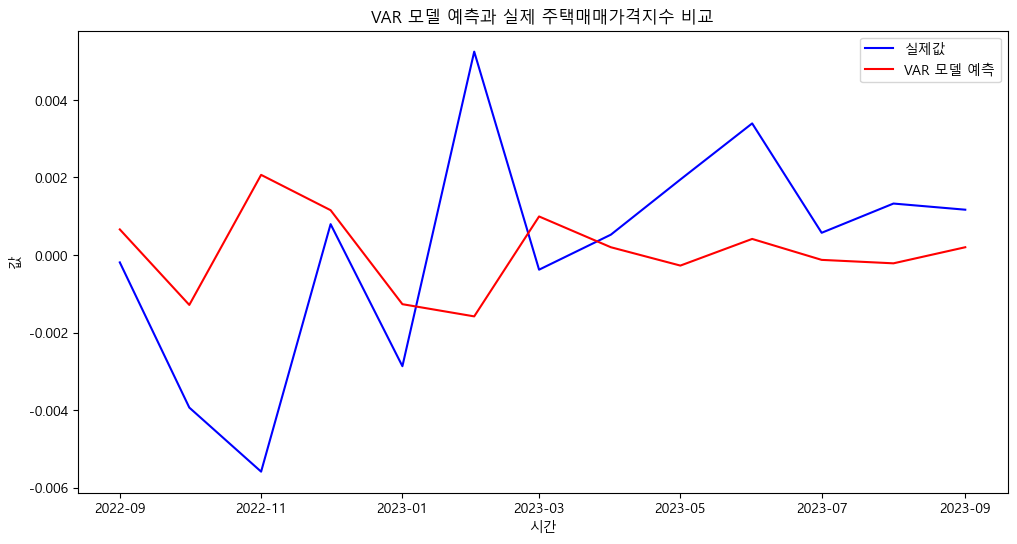

In [ ]:
# 예측과 실제 주택매매가격지수 비교
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(X_test_diff2):], X_test_diff2['주택매매가격지수'], label='실제값', color='blue')
plt.plot(forecast_df.index, forecast_df['주택매매가격지수'], label='VAR 모델 예측', color='red')
plt.title('VAR 모델 예측과 실제 주택매매가격지수 비교')
plt.xlabel('시간')
plt.ylabel('값')
plt.legend()
plt.show()


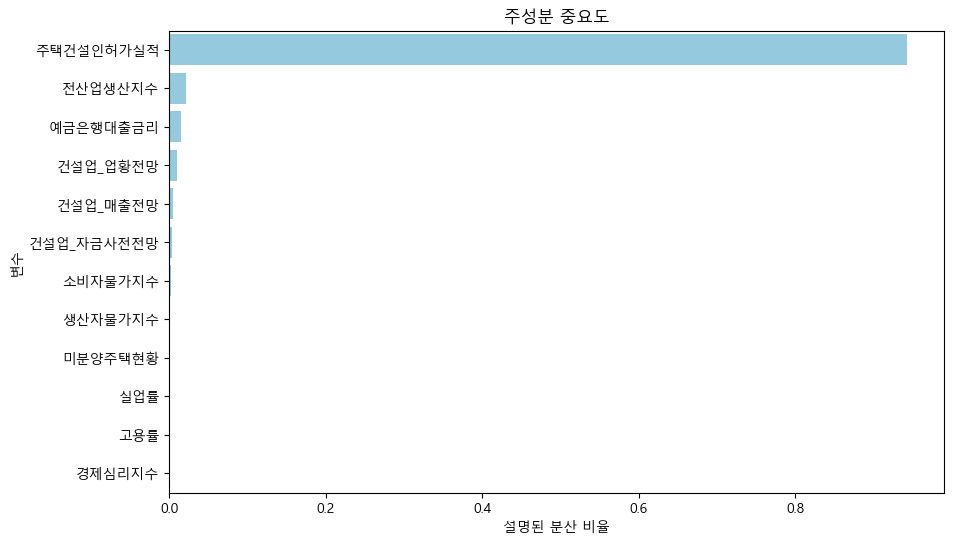

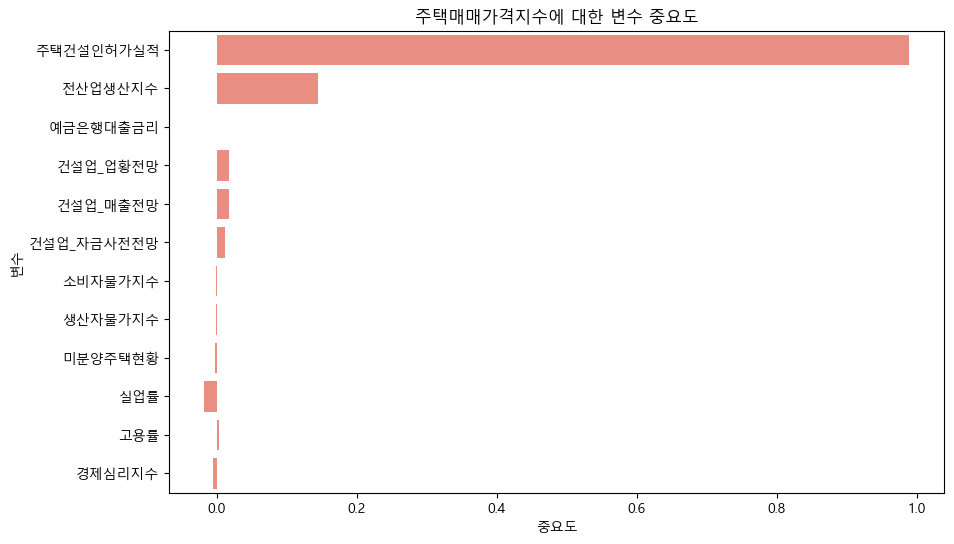

In [ ]:
import seaborn as sns

# 주성분 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=explained_variance_ratio, y=endogeneous_var.iloc[:,:-1].columns, color='skyblue')
plt.title('주성분 중요도')
plt.xlabel('설명된 분산 비율')
plt.ylabel('변수')
plt.show()

# 주택매매가격지수에 대한 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=variable_importance, y=endogeneous_var.iloc[:,:-1].columns, color='salmon')
plt.title('주택매매가격지수에 대한 변수 중요도')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


In [ ]:

# Evaluate the forecasts
from sklearn.metrics import mean_squared_error

for i in forecast_df.columns:
    mse = mean_squared_error(X_test_diff2[i], forecast_df[i])
    print(f'Mean Squared Error for {i}: {mse}')

# Optionally, you can inverse the differencing to obtain forecasts in the original scale
forecast_original_scale = np.cumsum(np.cumsum(forecast, axis=0), axis=0) + data.iloc[-1, :].values

# Plot the forecasts in the original scale
forecast_original_scale_df = pd.DataFrame(forecast_original_scale, index=X_test_diff2.index, columns=X_test_diff2.columns)
forecast_original_scale_df.plot()


In [ ]:
# lag order 값 산출 (적분차수)
var_lag_order = var_fit.k_ar

var_fit.forecast(X_train_diff2.values[-var_lag_order:], steps=len(X_test_diff2), exog_future=)

ValueError: Please provide an exog_future argument to the forecast method.

In [ ]:
var_lag_order

3

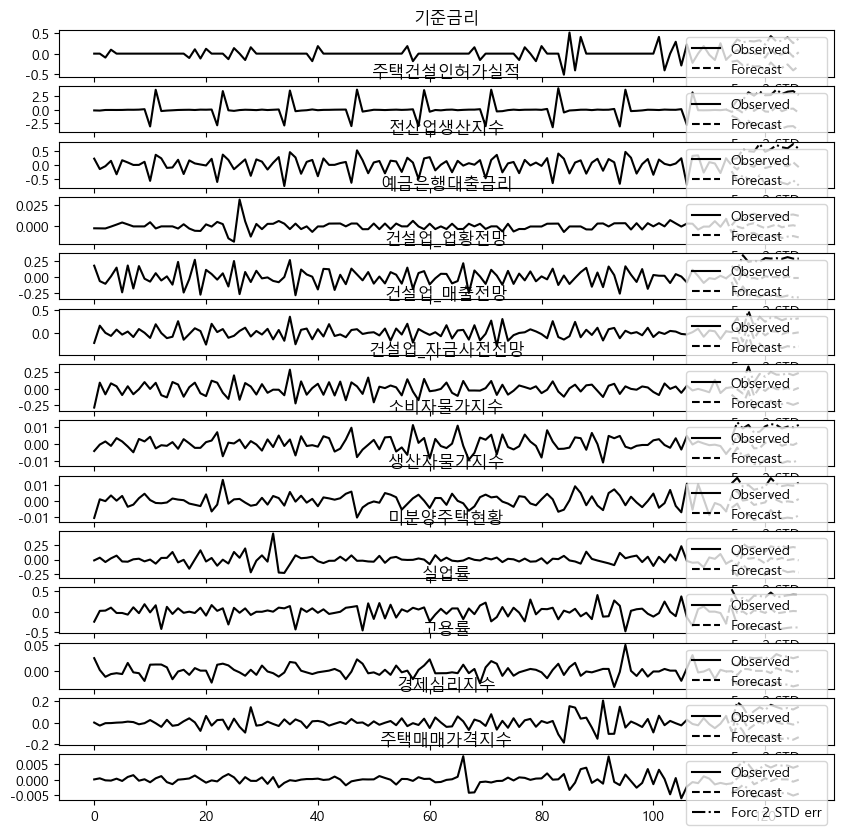

In [ ]:
var_fit.plot_forecast(steps=len(X_test_diff2))
plt.show()

In [ ]:
# 예측 결과를 데이터프레임으로 만들기
pred_var = var_fit.forecast(X_train_diff2.values, steps=len(X_test_diff2))
pred_df = pd.DataFrame(pred_var, index=X_test_diff2.index, columns=X_test_diff2.columns + '_pred')

# 평가 (MAE, MSE, RMSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(X_test_diff2['주택매매가격지수'],pred_df['주택매매가격지수_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(X_test_diff2['주택매매가격지수'], pred_df['주택매매가격지수_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 0.002364
MSE: 0.000010
RMSE: 0.003230


#### VECM

In [ ]:
# train, test 분리
X_train = data[:int(len(data)*0.9)]
X_test = data[int(len(data)*0.9):]

In [ ]:
from statsmodels.tsa.vector_ar import vecm
## Statistical Test for Cointegration (VECM 공적분 테스트)
## 귀무가설 : 공적분 특성없다, 대립가설 : 공적분 특성 있다

vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, signif=0.01)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0  14          823.7            nan
  1  14          661.4            nan
  2  14          527.8          375.3
  3  14          425.4          322.4
  4  14          334.9          273.4
  5  14          261.8          228.2
  6  14          192.4          187.2
  7  14          142.0          150.1
-------------------------------------


c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:581: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  coint_result = coint_johansen(endog, det_order, k_ar_diff)


c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


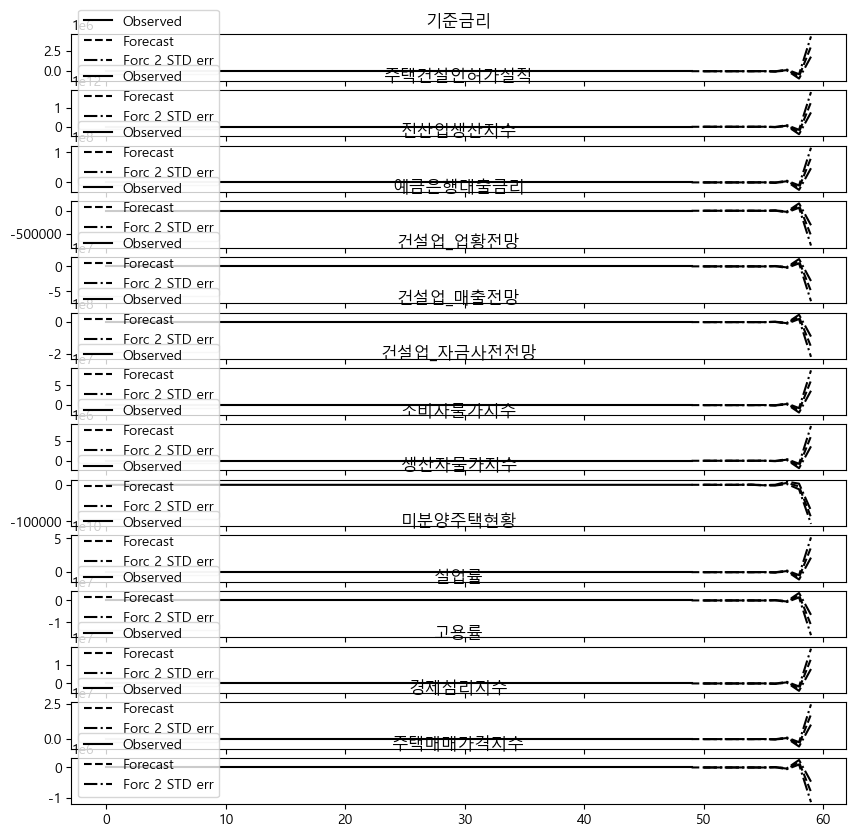

In [ ]:
vecm = vecm.VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)
vecm_fit.plot_forecast(steps=10, n_last_obs=50)

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# VAR 모델을 위한 데이터 선택
var_data = data[['주택매매가격지수', '기준금리', '주택건설인허가실적', '전산업생산지수', '예금은행대출금리', '건설업_업황전망',
       '건설업_매출전망', '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률',
       '경제심리지수']]

# VAR 모델 생성
model = sm.tsa.VAR(var_data)

# AIC 기준으로 최적의 시차 선택
best_order = model.select_order()

# 최적의 시차로 모델 피팅
result = model.fit(best_order.aic)


c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Nov, 2023
Time:                     12:42:31
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                    46.6082
Nobs:                     122.000    HQIC:                   27.6914
Log likelihood:          -1937.46    FPE:                1.97952e+10
AIC:                      14.7527    Det(Omega_mle):     4.83175e+06
--------------------------------------------------------------------
Results for equation 주택매매가격지수
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                33.794905        15.488375            2.182           0.029
L1.주택매매가격지수           1.091246         0.174444            6.256           0.000
L1.기준금리               0.100756         0.257017          

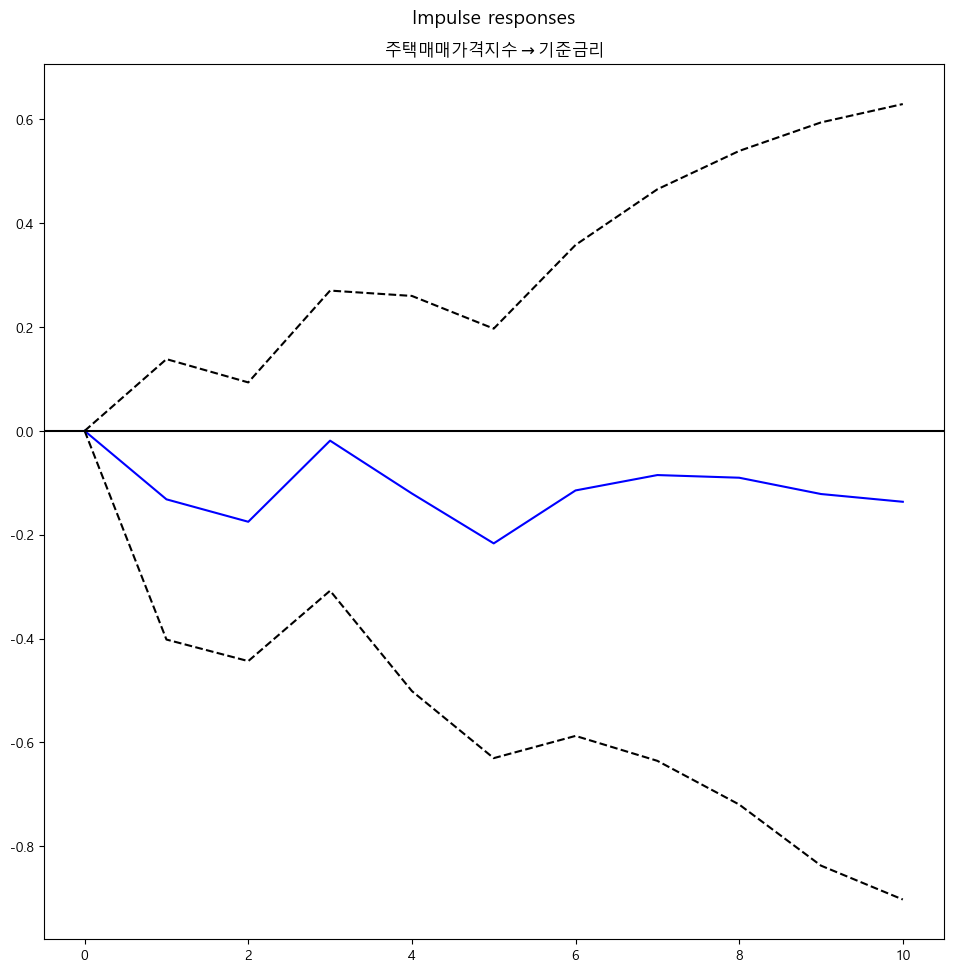

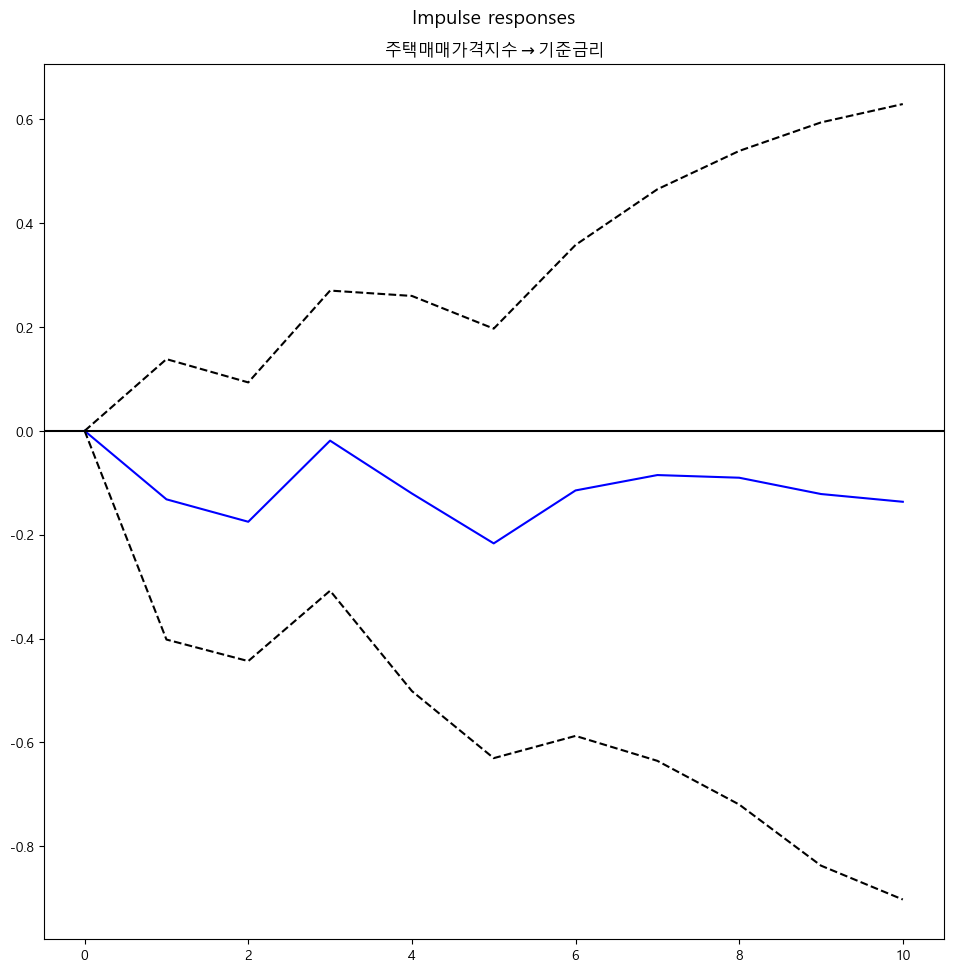

In [ ]:
result.irf().plot(impulse='주택매매가격지수', response='기준금리')

In [ ]:

# impulse response 함수를 사용하여 변수 간의 동적 효과 확인
irf = result.irf()

# 주택매매가격지수에 대한 다른 변수들의 영향 확인
irf.plot(impulse='주택매매가격지수', response=['기준금리', '주택건설인허가실적', '전산업생산지수'])

# 결과 출력
print(result.summary())


ValueError: ['기준금리', '주택건설인허가실적', '전산업생산지수'] is not in list

In [ ]:
data.head()

,기준금리,주택건설인허가실적,전산업생산지수,예금은행대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,실업률,고용률,경제심리지수,주택매매가격지수
Date,,,,,,,,,,,,,,
2013-01-01,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,75180,3.4,57.7,94.4,70.462
2013-02-01,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,73386,3.9,57.5,96.2,70.421
2013-03-01,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,70633,3.5,58.7,98.3,70.389
2013-04-01,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,70201,3.2,60.0,97.9,70.391
2013-05-01,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,66896,3.0,60.6,97.2,70.381


In [ ]:
import types
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
def transform(column, transforms):
    transformation = transforms[column.name]
    # For monthly data, we will compute
    # annualized percent changes
    mult = 12 if column.index.freqstr[0] == 'M' else 1
    
    # 1 => No transformation
    if transformation == 1:
        pass
    # 2 => First difference
    elif transformation == 2:
        column = column.diff()
    # 3 => Second difference
    elif transformation == 3:
        column = column.diff().diff()
    # 4 => Log
    elif transformation == 4:
        column = np.log(column)
    # 5 => Log first difference, multiplied by 100
    #      (i.e. approximate percent change)
    #      with optional multiplier for annualization
    elif transformation == 5:
        column = np.log(column).diff() * 100 * mult
    # 6 => Log second difference, multiplied by 100
    #      with optional multiplier for annualization
    elif transformation == 6:
        column = np.log(column).diff().diff() * 100 * mult
    # 7 => Exact percent change, multiplied by 100
    #      with optional annualization
    elif transformation == 7:
        column = ((column / column.shift(1))**mult - 1.0) * 100
        
    return column


In [ ]:
def remove_outliers(dta):
    # Compute the mean and interquartile range
    mean = dta.mean()
    iqr = dta.quantile([0.25, 0.75]).diff().T.iloc[:, 1]
    
    # Replace entries that are more than 10 times the IQR
    # away from the mean with NaN (denotes a missing entry)
    mask = np.abs(dta) > mean + 10 * iqr
    treated = dta.copy()
    treated[mask] = np.nan

    return treated

In [ ]:
data_m

,기준금리,주택건설인허가실적,전산업생산지수,예금은행대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,실업률,고용률,경제심리지수,주택매매가격지수
2013-02,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,73386,3.9,57.5,96.2,70.421
2013-03,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,70633,3.5,58.7,98.3,70.389
2013-04,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,70201,3.2,60.0,97.9,70.391
2013-05,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,66896,3.0,60.6,97.2,70.381
2013-06,2.50,180263,94.5794,4.26,56,72,72,92.710,104.55,65072,3.1,60.8,96.3,70.353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05,3.50,157534,101.7229,4.19,69,78,70,111.130,120.03,68865,2.7,63.5,94.2,93.766
2023-06,3.50,189213,115.8033,4.21,67,79,69,111.120,119.77,66388,2.7,63.5,95.7,93.536
2023-07,3.50,207278,96.5414,4.21,69,80,77,111.200,120.08,63087,2.7,63.2,94.1,93.360
2023-08,3.50,212757,100.3359,4.22,70,78,78,112.330,121.17,61811,2.0,63.1,94.0,93.308


In [ ]:
data.columns

Index(['Date', '기준금리', '주택건설인허가실적', '전산업생산지수', '예금은행대출금리', '건설업_업황전망',
       '건설업_매출전망', '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률',
       '경제심리지수', '주택매매가격지수'],
      dtype='object')

In [ ]:
transform_m = data.iloc[0,:-1]
data_m = data.iloc[1:]

data_m.index = pd.PeriodIndex(data_m.Date.tolist(), freq = 'M')
data_m.drop('Date', axis=1, inplace=True)

# Apply the transformations
dta_m = data_m.apply(transform, axis=0, transforms=transform_m)

# Remove outliers 
dta_m = remove_outliers(dta_m)

# - Output datasets ------------------------------------------------------
types.SimpleNamespace(
    data_m=data_m, 
    dta_m=dta_m, transform_m=transform_m)

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_8360\2285220523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m.drop('Date', axis=1, inplace=True)


KeyError: '주택매매가격지수'

In [ ]:
data_m

,Date,기준금리,주택건설인허가실적,전산업생산지수,예금은행대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,실업률,고용률,경제심리지수,주택매매가격지수
1,2013-02-01 00:00:00,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,73386,3.9,57.5,96.2,70.421
2,2013-03-01 00:00:00,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,70633,3.5,58.7,98.3,70.389
3,2013-04-01 00:00:00,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,70201,3.2,60.0,97.9,70.391
4,2013-05-01 00:00:00,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,66896,3.0,60.6,97.2,70.381
5,2013-06-01 00:00:00,2.50,180263,94.5794,4.26,56,72,72,92.710,104.55,65072,3.1,60.8,96.3,70.353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2023-05-01 00:00:00,3.50,157534,101.7229,4.19,69,78,70,111.130,120.03,68865,2.7,63.5,94.2,93.766
125,2023-06-01 00:00:00,3.50,189213,115.8033,4.21,67,79,69,111.120,119.77,66388,2.7,63.5,95.7,93.536
126,2023-07-01 00:00:00,3.50,207278,96.5414,4.21,69,80,77,111.200,120.08,63087,2.7,63.2,94.1,93.360
127,2023-08-01 00:00:00,3.50,212757,100.3359,4.22,70,78,78,112.330,121.17,61811,2.0,63.1,94.0,93.308
